# **Proyecto Final: PDA para el control de rutas de cruceros**

---


**Autómatas y Lenguajes Formales**

**Escuela de Ingeniería de Sistemas e Informática**

**Integrantes:**

*   Laura Rodriguez Cala
*   Juan David Patiño Pedraza
*   Oscar Andrés Ramírez Serna

Marzo de 2022


---



In [ ]:
!pip install automata-lib==1.0.0.post4

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

# **Definición formal del autómata**

La definición formal de un autómata de pila (PDA) es la siguiente:

 P = (𝑄, ∑, Γ, δ, q0, Z, 𝐹) 


 Donde:

**𝑄**: Conjunto finito de estados 

**∑**: Símbolos de entrada

**Γ**: Alfabeto de pila

**δ**: Transiciones

**q0**: Estado inicial

**Z**: Símbolo inicial

**F**: Estados finales



# **Diagrama de estados**

Saving CorrespondenciaEstados.jpeg to CorrespondenciaEstados.jpeg


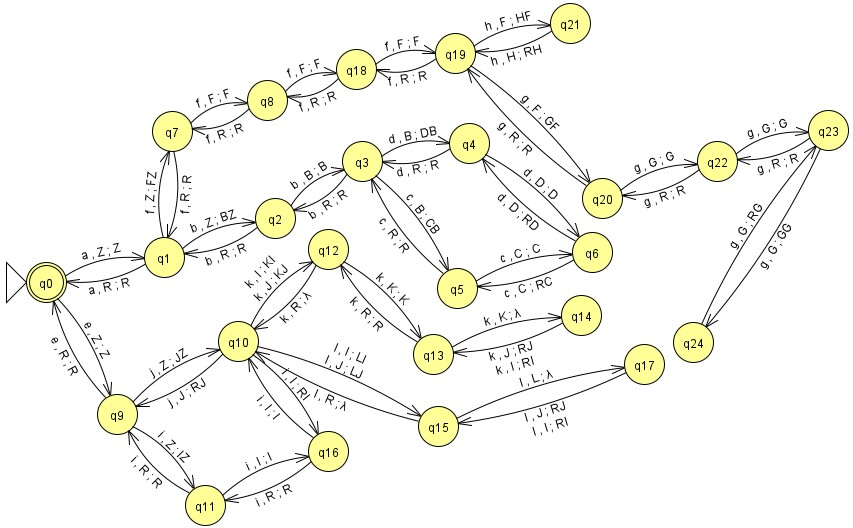

In [ ]:
Image('DiagramaEstados.jpg', width = 800)


# **Correspondencia de Estados**

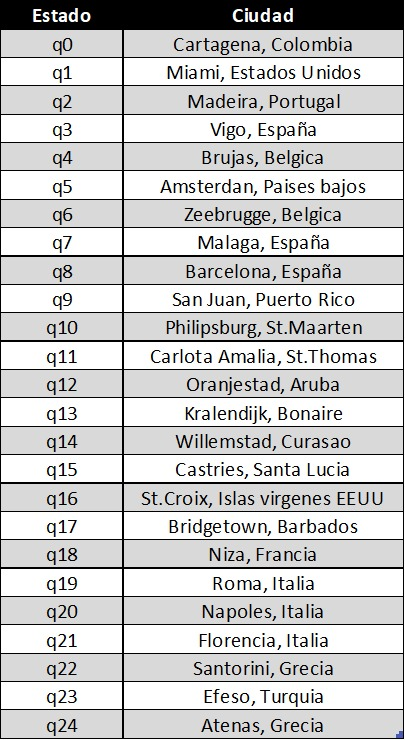

In [ ]:
Image('CorrespondenciaEstados.jpeg', width = 310)


# **Transiciones**

δ(q0,a,Z) = (q1,Z)

δ(q0,e,Z) = (q9,Z)

δ(q1,b,Z) = (q2,BZ)

δ(q1,f,Z) = (q7,FZ)

δ(q1,a,R) = (q0,R)

δ(q2,b,B) = (q3,B)

δ(q2,b,R) = (q1,R)

δ(q3,d,B) = (q4,DB)

δ(q3,c,B) = (q5,CB)

δ(q3,b,R) = (q2,R)

δ(q4,d,D) = (q6,D)

δ(q4,d,R) = (q3,R)

δ(q5,c,C) = (q6,C)

δ(q5,c,R) = (q3,R)

δ(q6,d,D) = (q4,RD)

δ(q6,c,C) = (q5,RC)

δ(q7,f,F) = (q8,F)

δ(q7,f,R) = (q1,R)

δ(q8,f,F) = (q18,F)

δ(q8,f,R) = (q7,R)

δ(q9,j,Z) = (q10,JZ)

δ(q9,i,Z) = (q11,IZ)

δ(q9,e,R) = (q0,R)

δ(q10,k,J) = (q12,KJ)

δ(q10,k,I) = (q12,KI)

δ(q10,l,J) = (q15,LJ)

δ(q10,l,I) = (q15,LI)

δ(q10,j,J) = (q9,RJ)

δ(q10,i,I) = (q16,RI)

δ(q11,i,I) = (q16,I)

δ(q11,i,R) = (q9,R)

δ(q12,k,K) = (q13,K)

δ(q12,k,R) = (q10, ɛ)

δ(q13,k,K) = (q14, ɛ)

δ(q13,k,R) = (q12,R)

δ(q14,k,I) = (q13,RI)

δ(q14,k,J) = (q13,RJ)

δ(q15,l,L) = (q17, ɛ)

δ(q15,l,R) = (q10, ɛ)

δ(q16,i,I) = (q10, I)

δ(q16,i,R) = (q11, R)

δ(q17,l,I) = (q15, RI)

δ(q17,l,J) = (q15, RJ)

δ(q18,f,F) = (q19,F)

δ(q18,f,R) = (q8, R)

δ(q19,g,F) = (q20, GF)

δ(q19,h,F) = (q21, HF)

δ(q19,f,R) = (q18, R)

δ(q20,g,G) = (q22, G)

δ(q20,g,R) = (q19, R)

δ(q21,h,H) = (q19, RH)

δ(q22,g,G) = (q23, G)

δ(q22,g,R) = (q20, R)

δ(q23,g,G) = (q24, G)

δ(q23,g,R) = (q22, R)

δ(q24,g,G) = (q23, GX)


# **Implementacion del automata**

In [ ]:
from automata.pda.dpda import DPDA
dpda = DPDA(
    states={'q0', 'q1', 'q2', 'q3','q4','q5','q6','q7','q8','q9','q10','q11','q12','q13','q14','q15','q16','q17','q18','q19','q20','q21','q22','q23','q24'},
    input_symbols={'a','b','c','d','e','f','g','h','i','j','k','l'},
    stack_symbols={'B','C','D','F','G','H','I','J','K','L', 'Z','R'},
    transitions={
        'q0': {
            'a': {'Z': ('q1', ('Z',))} ,
            'e': {'Z': ('q9', ('Z',))}
        },
        'q1': {
            'b': {'Z': ('q2', ('B','Z'))},
            'f': {'Z': ('q7', ('F','Z'))},
            'a': {'R': ('q0', ('R',))} 
        },
        'q2': {
            'b': {'B': ('q3', ('B',)),
                  'R': ('q1', ('R',))}
        },
        'q3': {
            'd': {'B': ('q4', ('D','B'))},
            'c': {'B': ('q5', ('C','B'))},
            'b': {'R': ('q2', ('R',))} 
        },
        'q4': {
            'd': {'D': ('q6', ('D',)),
                  'R': ('q3', ('R',))}
        },
        'q5': {
            'c': {'C': ('q6', ('C',)),
                  'R': ('q3', ('R',))} 
        },
        'q6': {
            'd': {'D': ('q4', ('R','D'))},
            'c': {'C': ('q5', ('R','C'))},
        },
        'q7': {
            'f': {'F': ('q8', ('F',)),
                  'R': ('q1', ('R',))} 
        },
        'q8': {
            'f': {'F': ('q18', ('F',)),
                  'R': ('q7', ('R',))} 
        },
        'q9': {
            'j': {'Z': ('q10', ('J','Z'))},
            'i': {'Z': ('q11', ('I','Z'))},
            'e': {'R': ('q0', ('R',))} 
        },
        'q10': {
            'k': {'J': ('q12', ('K','J')),
                  'I': ('q12', ('K','I'))},
            'l': {'J': ('q15', ('L','J')),
                  'I': ('q15', ('L','I'))},
            'j': {'J': ('q9', ('R','J'))},
            'i': {'I': ('q16', ('R','I'))}  
        },
        'q11': {
            'i': {'I': ('q16', ('I',)),
                  'R': ('q9', ('R',))}  
        },
        'q12': {
            'k': {'K': ('q13', ('K',)),
                  'R': ('q10', '')}  
        },
        'q13': {
            'k': {'K': ('q14', ''),
                  'R': ('q12', ('R',))}
        },
        'q14': {
            'k': {'I': ('q13', ('R','I')),
                  'J': ('q13', ('R','J'))}  
        },
        'q15': {
            'l': {'L': ('q17', ''),
                  'R': ('q10', '')}  
        },
        'q16': {
            'i': {'I': ('q10', ('I',)),
                  'R': ('q11', ('R',))}  
        },
        'q17': {
            'l': {'I': ('q15', ('R','I')),
                  'J': ('q15', ('R','J'))}  
        },
        'q18': {
            'f': {'F': ('q19', ('F',)),
                  'R': ('q8', ('R',))} 
        },
        'q19': {
            'g': {'F': ('q20', ('G','F'))},
            'h': {'F': ('q21', ('H','F'))},
            'f': {'R': ('q18', ('R',))} 
        },
        'q20': {
            'g': {'G': ('q22', ('G',)),
                  'R': ('q19', ('R',))}
        },
        'q21': {
            'h': {'H': ('q19', ('R','H'))}
        },
        'q22': {
            'g': {'G': ('q23', ('G',)),
                  'R': ('q20', ('R',))}
        },
        'q23': {
            'g': {'G': ('q24', ('G',)),
                  'R': ('q22', ('R',))}
        },
        'q24': {
            'g': {'G': ('q23', ('G','X'))}
        },

    },
    initial_state='q0',
    initial_stack_symbol='Z',
    final_states={'q0'}
)

# **Validar ruta del barco**

In [ ]:
import urllib, urllib.parse, inspect;
def validar(r):
  ruta = r
  try: 
     dpda.validate_input(ruta)
     return True
  except  Exception as e:
    return False

print("Ingrese el recorrido de ida realizado por el barco")
r1 = input()
print("Ingrese el recorrido de regreso realizado por el barco")
r2 = input()
ruta = r1+r2
if validar(ruta) == True: 
  print("El recorrido realizado por el barco es correcto")
else: 
  print("El barco tuvo una desviacion anormal en su recorrido")

Ingrese el recorrido de ida realizado por el barco
aff
Ingrese el recorrido de regreso realizado por el barco
ffa
El barco tuvo una desviacion anormal en su recorrido
